In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [3]:
data, test = data.select_dtypes(include=np.number), test.select_dtypes(include=np.number)
data, test = data.dropna(), test.dropna()
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

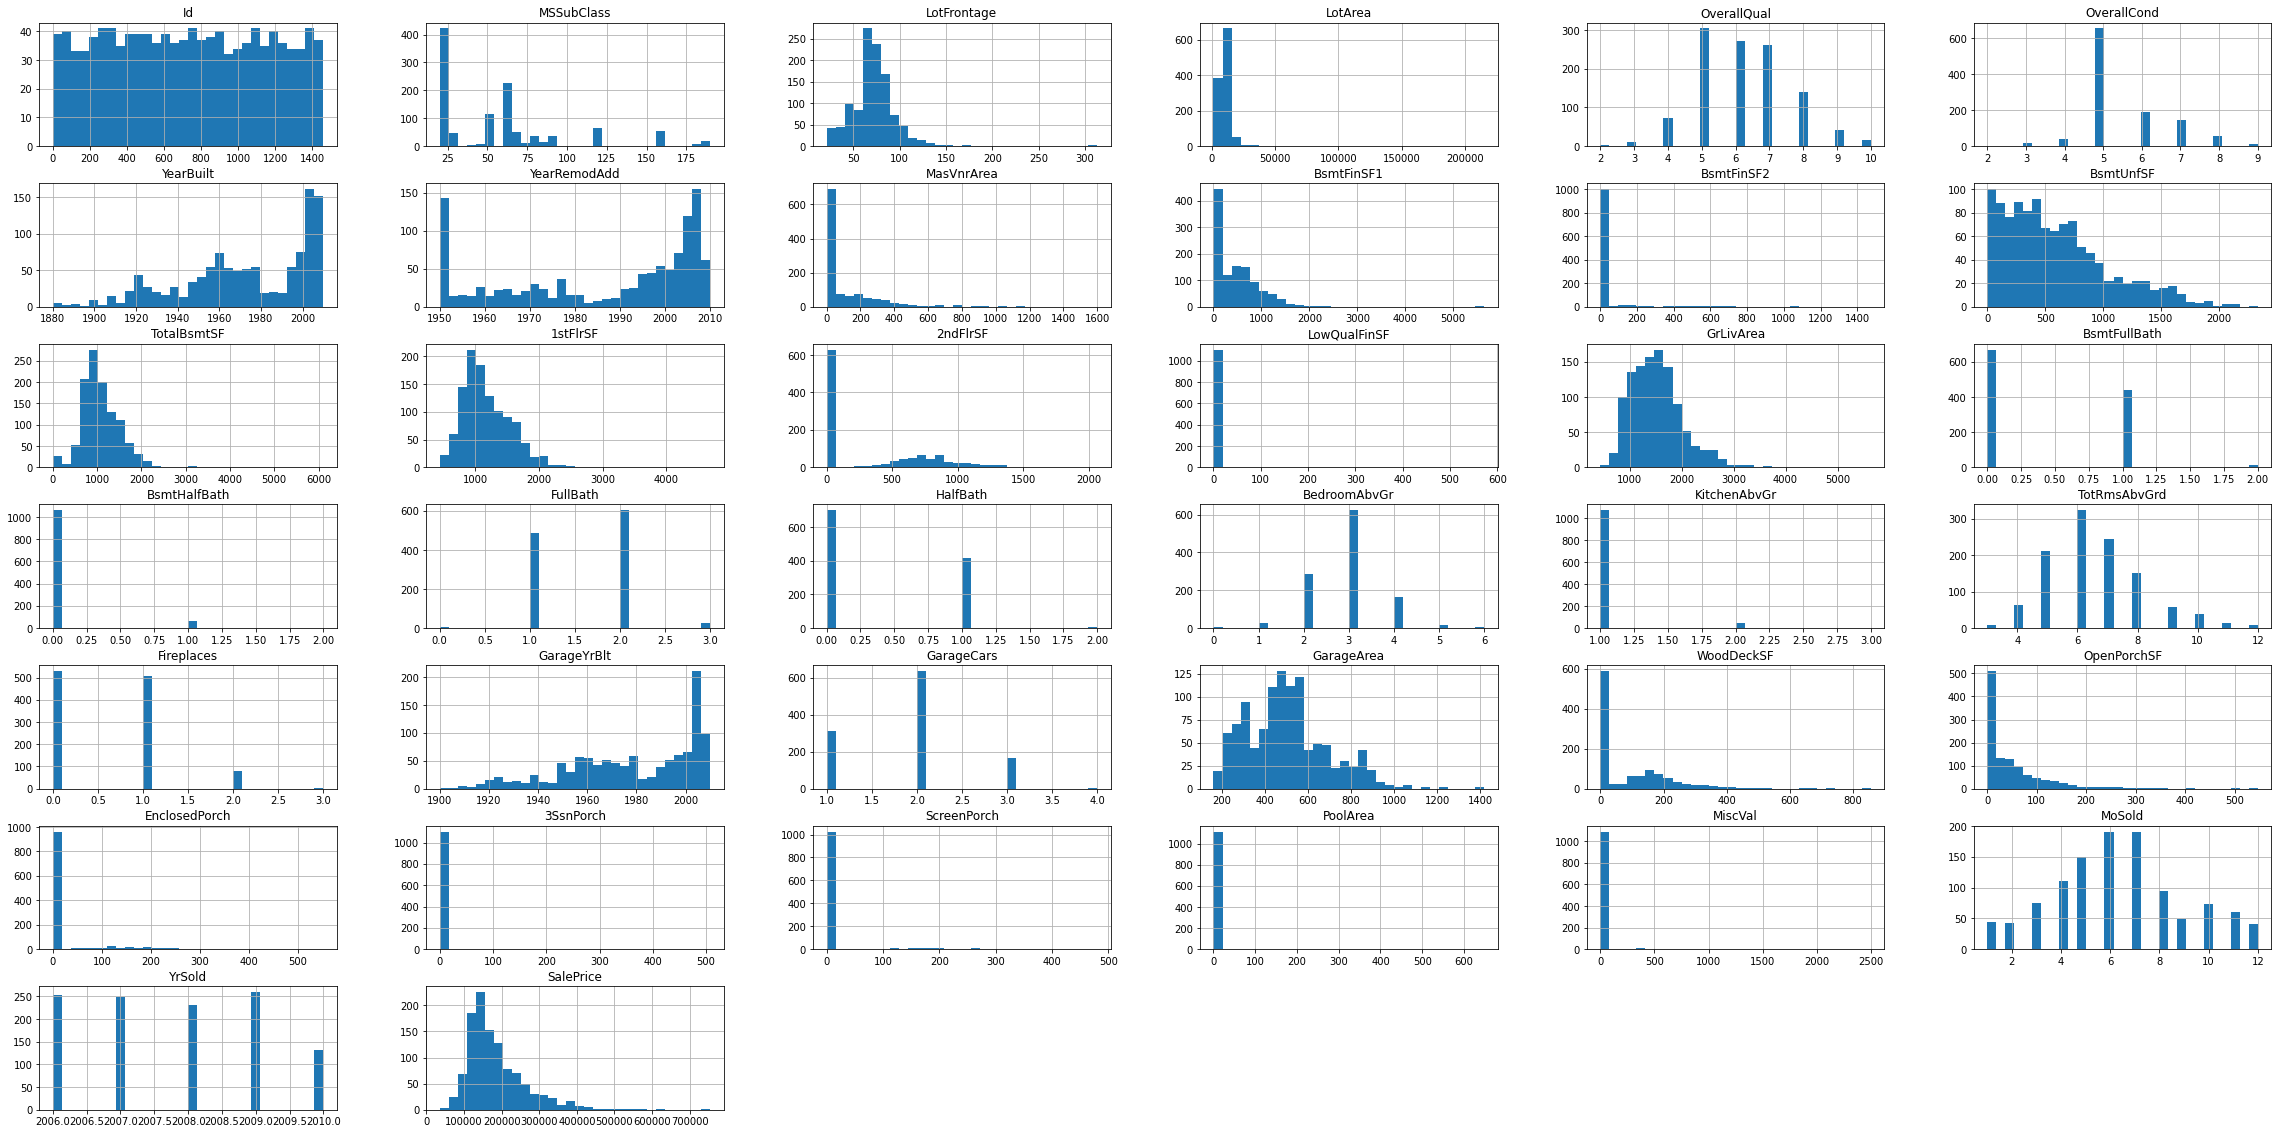

In [4]:
data.hist(figsize=(40,20), bins=30)

<AxesSubplot:>

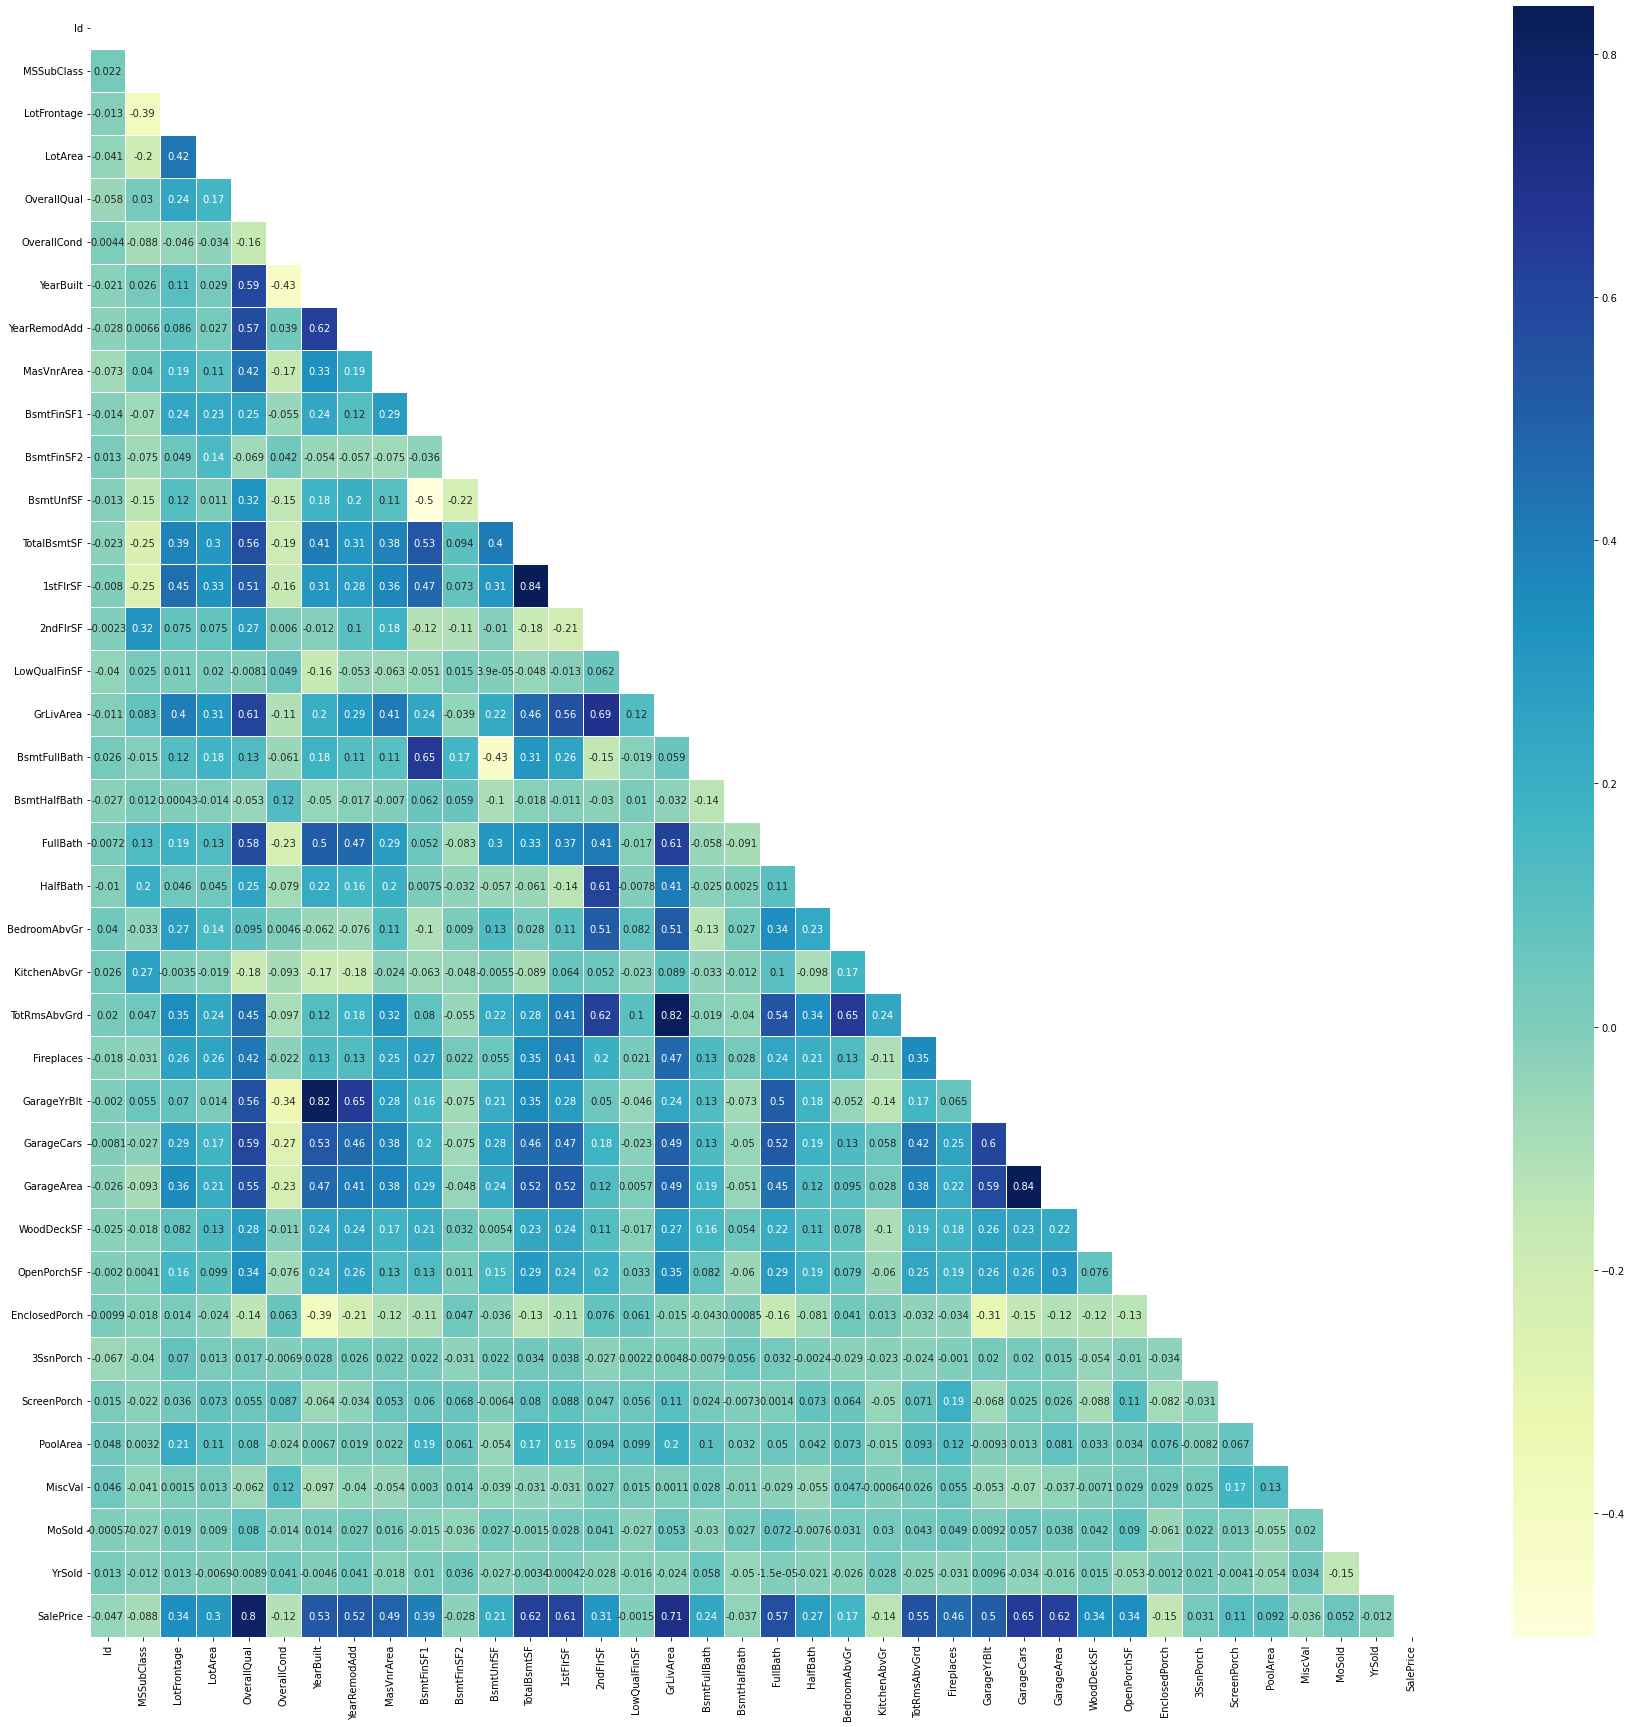

In [5]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, linewidth=.8, mask=np.triu(data.corr()), cmap="YlGnBu")

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = x_train.to_numpy(), x_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((896, 37), (225, 37), (896,), (225,))

In [22]:
xgb = XGBRegressor(n_estimators=2000, learning_rate=0.05)
xgb.fit(x_train, y_train)

SVR_ = SVR()
SVR_.fit(x_train, y_train)

model = Sequential()
model.add(Input(shape=[len(x_train[0])]))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(), metrics=['mae', 'mse'])
model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=0)


In [23]:
svr_pred = SVR_.predict(x_test)
xbg_pred = xgb.predict(x_test)
nn_pred = model.predict(x_test)

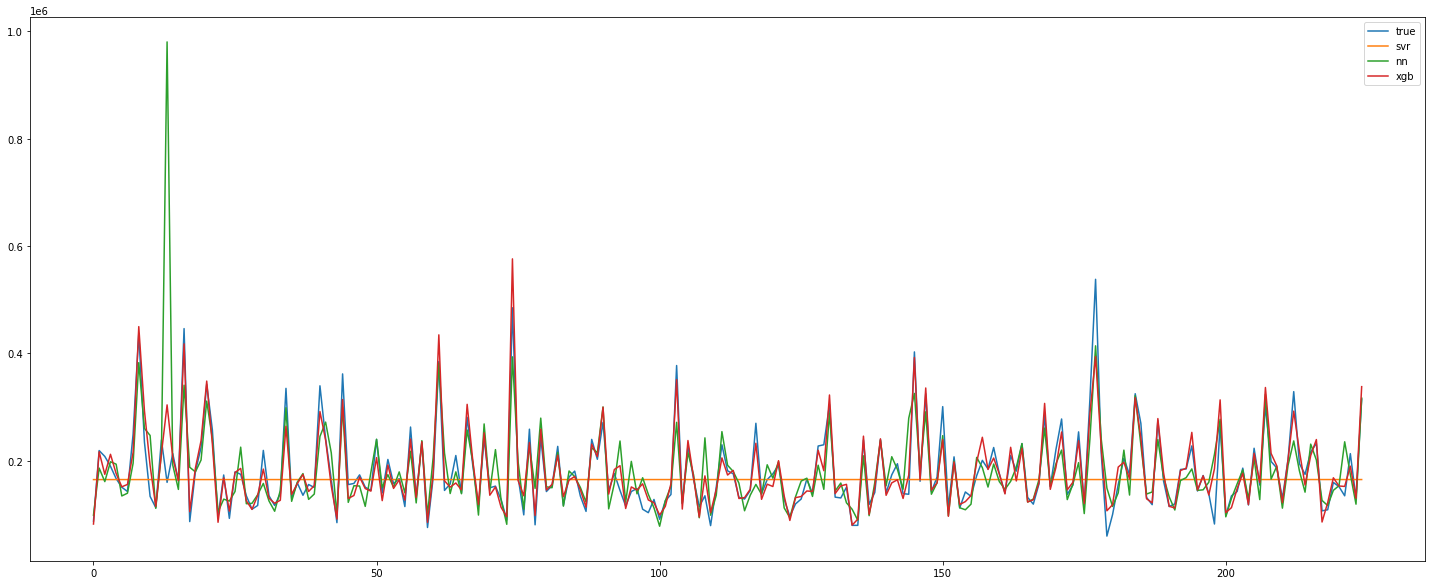

In [24]:
plt.figure(figsize=(25,10))
plt.plot(y_test, label='true')
plt.plot(svr_pred, label='svr')
plt.plot(nn_pred, label='nn')
plt.plot(xbg_pred, label='xgb')
plt.legend()

In [25]:
print(mean_absolute_error(y_test, svr_pred), mean_absolute_error(y_test, xbg_pred), mean_absolute_error(y_test, nn_pred))
print(mean_squared_error(y_test, svr_pred), mean_squared_error(y_test, xbg_pred), mean_squared_error(y_test, nn_pred))

53934.41653410218 16214.593159722222 30130.33079861111
6015982066.130711 650992153.7860805 4431755362.78653
